In [4]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from pandas.core.frame import DataFrame
#from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns;
from mlxtend.regressor import StackingCVRegressor

In [3]:
bikedata = pd.read_csv('~/Desktop/bikedata.csv', index_col=False)
bikedata.head()

,Unnamed: 0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,...,avg_hum,avg_windspeed,pre_cnt_2,pre_cnt_7,casual_2,casual_7,registered_2,registered_7,trend,increase_percentage
0,9,9,9/1/11,1,0,1,0,0,0,1,...,0.569077,0.180397,1510.0,801.0,148,131,1362,670,-1,-0.455629
1,10,10,10/1/11,1,0,1,0,1,1,1,...,0.530506,0.195591,959.0,1349.0,68,120,891,1229,1,0.377477
2,11,11,11/1/11,1,0,1,0,2,1,2,...,0.493089,0.211793,822.0,1562.0,54,108,768,1454,1,0.536496
3,12,12,12/1/11,1,0,1,0,3,1,1,...,0.499609,0.208215,1321.0,1600.0,41,82,1280,1518,-1,-0.120363
4,13,13,13/1/11,1,0,1,0,4,1,1,...,0.513314,0.202763,1263.0,1606.0,43,88,1220,1518,1,0.113222


# Split Traindata and Testdata

In [1760]:
index = bikedata['yr']
traindata = bikedata[index == 0]
testdata = bikedata[index ==1]

# Feature Selection

In [1761]:
cols = [0,1,2,4,10,14,15,18,19,20,21,22,25,26,27,28,29,30]
traindata.drop(traindata.columns[cols],axis=1,inplace=True)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1762]:
traindata.columns.values.tolist()

['season',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'atemp',
 'hum',
 'windspeed',
 'cnt',
 'weekly_avg_cnt',
 'pre_cnt_2',
 'pre_cnt_7']

In [1763]:
testdata.drop(testdata.columns[cols],axis=1,inplace=True)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# 1. Using Target Variable "cnt"

In [1764]:
Y_train = traindata['cnt'].values
X_train = traindata.drop('cnt', axis=1).values

Y_test = testdata['cnt'].values
X_test = testdata.drop('cnt', axis=1).values

In [1796]:
#define function of calculating profit
def calculate_profit(a,b):
    return min(a,b)*3-b*2;

# 1.1 Single Model - Neural Network

In [1797]:
np.random.seed(123)
NN = MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=1000, momentum=0.8,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False)

In [1798]:
profit_table = pd.DataFrame({"NN": profit_NN},index=[0])
profit_table

,NN
0,96669.7


In [1799]:
NN.fit(X_train,Y_train)
pred_NN = NN.predict(X_test)
rmse_NN  =sqrt(mean_squared_error(Y_test, np.around(pred_NN)))     
mae_NN = mean_absolute_error(Y_test, np.around(pred_NN))

prediction_NN = pd.DataFrame({"Pred":np.around(pred_NN),"cnt":Y_test})
prediction_NN.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Pred,cnt
0,1903.0,2294.0
1,1957.0,1951.0
2,1972.0,2236.0
3,2130.0,2368.0
4,2311.0,3272.0


In [1800]:
#create a whole prediction table
prediction = pd.DataFrame({"cnt":Y_test, "season":testdata['season'],"month": testdata['mnth'], "pred_NN":np.around(pred_NN)})
prediction.head()

,cnt,month,pred_NN,season
357,2294.0,1,1903.0,1
358,1951.0,1,1957.0,1
359,2236.0,1,1972.0,1
360,2368.0,1,2130.0,1
361,3272.0,1,2311.0,1


In [1801]:
prediction_NN['Profit'] = prediction_NN.apply(lambda row: calculate_profit(row['cnt'], row['Pred']), axis=1)
profit_NN = sum(prediction_NN['Profit'])

In [1802]:
print("Profit:{}".format(profit_NN))
print("RMSE:{0:.8}".format(rmse_NN))
print("MAE:{0:.08}".format(mae_NN))

Profit:1622504.5
RMSE:1101.5204
MAE:835.94399


# 1.2 Single Model - Bayesian Regression

In [1803]:
np.random.seed(123)
bayesian = linear_model.BayesianRidge(alpha_1=0.0001, alpha_2=0.0001,
       fit_intercept=True, lambda_1=0.001, lambda_2=0.001, n_iter=1000,
       tol=0.01, verbose=False)

In [1804]:
bayesian_fit = bayesian.fit(X_train, Y_train)
pred_bayesian = bayesian_fit.predict(X_test)
prediction['pred_bayesian'] = np.around(pred_bayesian)
prediction.head()

,cnt,month,pred_NN,season,pred_bayesian
357,2294.0,1,1903.0,1,2131.0
358,1951.0,1,1957.0,1,2183.0
359,2236.0,1,1972.0,1,2290.0
360,2368.0,1,2130.0,1,2308.0
361,3272.0,1,2311.0,1,2473.0


In [1805]:
rmse_bayesian  =sqrt(mean_squared_error(Y_test, np.around(pred_bayesian)))     
mae_bayesian = mean_absolute_error(Y_test, np.around(pred_bayesian))

pred_bayesian = pd.DataFrame({"Pred":np.around(pred_bayesian),"cnt":Y_test})
pred_bayesian['Profit'] = pred_bayesian.apply(lambda row: calculate_profit(row['cnt'], row['Pred']), axis=1)

profit_bayesian = sum(pred_bayesian['Profit'])
print(profit_bayesian)

1631590.5


In [1806]:
print("Profit:{}".format(profit_bayesian))
print("RMSE:{0:.8}".format(rmse_bayesian))
print("MAE:{0:.08}".format(mae_bayesian))

Profit:1631590.5
RMSE:1102.988
MAE:869.47951


# 1.3 Ensemble - GradientBoosting Regression

In [1807]:
np.random.seed(123)
gbr = GradientBoostingRegressor(alpha = 0.1,n_estimators=300, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
gbr.fit(X_train,Y_train)
pred_gbr = gbr.predict(X_test)
prediction['pred_gbr'] = np.around(pred_gbr)

In [1808]:
rmse_gbr  =sqrt(mean_squared_error(Y_test, np.around(pred_gbr)))     
mae_gbr = mean_absolute_error(Y_test, np.around(pred_gbr))
pred_gbr = pd.DataFrame({"Pred":np.around(pred_gbr),"cnt":Y_test})

pred_gbr['Profit'] = pred_gbr.apply(lambda row: calculate_profit(row['cnt'], row['Pred']), axis=1)
results.head()
profit_gbr = sum(pred_gbr['Profit'])
profit_gbr  #1406341.0

1406341.0

In [1809]:
print("Profit:{}".format(profit_gbr))
print("RMSE:{0:.8}".format(rmse_gbr))
print("MAE:{0:.08}".format(mae_gbr))

Profit:1406341.0
RMSE:1985.2786
MAE:1774.1708


# 1.4 Ensemble - Stacking

In [1811]:
# Initializing models
svr_lin = SVR(kernel='linear')
mlp = MLPRegressor(random_state=1)
lasso = Lasso(random_state=1)

In [1812]:
np.random.seed(123)
stack = StackingCVRegressor(regressors=(svr_lin, lasso, gbr, NN, bayesian),
                            meta_regressor=mlp)

In [1813]:
stack.fit(X_train,Y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: Co

StackingCVRegressor(cv=5,
          meta_regressor=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
          refit=True,
          regressors=(SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False), Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   ...True, lambda_1=0.001, lambda_2=0.001,
       n_iter=1000, normalize=False, tol=0.01, verbose=False)),
          shuffle=True, store_train_meta_features=False,
          use_features_i

In [1814]:
pred_stack = stack.predict(X_test)
prediction['pred_stack'] = np.around(pred_stack)
cost_stack = sum(np.around(pred_stack)*2)
cost_stack

4120040.0

In [1815]:
rmse_stack  =sqrt(mean_squared_error(Y_test, np.around(pred_stack)))     
mae_stack = mean_absolute_error(Y_test, np.around(pred_stack))
pred_stack = pd.DataFrame({"Pred":np.around(pred_stack),"cnt":Y_test,"month":testdata['mnth']})
pred_stack.head()

,Pred,cnt,month
357,2444.0,2294.0,1
358,2133.0,1951.0,1
359,2273.0,2236.0,1
360,2181.0,2368.0,1
361,2674.0,3272.0,1


In [1816]:
# profit using one year data as traindata
pred_stack['Profit'] = pred_stack.apply(lambda row: calculate_profit(row['cnt'], row['Pred']), axis=1)
profit_stack = sum(pred_stack['Profit'])
profit_cost_ratio = profit_stack/cost_stack
profit_cost_ratio

0.4102702886379744

In [1817]:
pred_stack = pred_stack[pred_stack['month']>6]
profit_halfyear = sum(pred_stack['Profit'])
profit_halfyear

927671.0

In [1818]:
print("Profit:{}".format(profit_stack))
print("RMSE:{0:.8}".format(rmse_stack))
print("MAE:{0:.08}".format(mae_stack))

Profit:1690330.0
RMSE:930.26028
MAE:702.99044


In [1819]:
#plot RMSE and MAE
prediction.head()

,cnt,month,pred_NN,season,pred_bayesian,pred_gbr,pred_stack
357,2294.0,1,1903.0,1,2131.0,2253.0,2444.0
358,1951.0,1,1957.0,1,2183.0,1406.0,2133.0
359,2236.0,1,1972.0,1,2290.0,1604.0,2273.0
360,2368.0,1,2130.0,1,2308.0,1485.0,2181.0
361,3272.0,1,2311.0,1,2473.0,1960.0,2674.0


In [1820]:
performance = pd.DataFrame()

In [1821]:
for i in ("pred_NN","pred_bayesian","pred_gbr","pred_stack"):
  #prediction[,i]= (prediction[,i])
  for j in range(1, 13):
    temp = prediction[prediction['month']==j]
    RMSE = round(sqrt(mean_squared_error(temp['cnt'], temp[i])))
    MAE = round(mean_absolute_error(temp['cnt'], temp[i]))
    row = (i,j, RMSE, MAE)
    performance = performance.append(pd.DataFrame(list(row)).T,ignore_index=True,verify_integrity=False)

In [1822]:
# RMSE & MAE as month
performance.columns = ('Model', 'month', 'RMSE', 'MAE')
performance.head()

,Model,month,RMSE,MAE
0,pred_NN,1,881,689
1,pred_NN,2,1007,841
2,pred_NN,3,1242,937
3,pred_NN,4,1076,859
4,pred_NN,5,1212,897


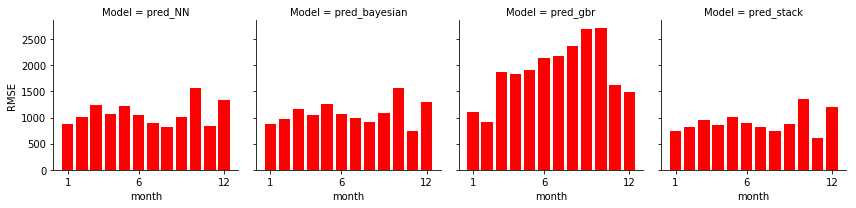

In [1823]:
plot_rmse = sns.FacetGrid(performance, col="Model")
plot = plot_rmse.map(plt.bar, "month" ,"RMSE",color='r').set(xlim=(0, 13),xticks=[1, 6, 12])

In [1824]:
performance = pd.DataFrame()
for i in ("pred_NN","pred_bayesian","pred_gbr","pred_stack"):
    RMSE = round(sqrt(mean_squared_error(prediction['cnt'], prediction[i])))
    MAE = round(mean_absolute_error(prediction['cnt'], prediction[i]))
    row = (i, RMSE, MAE)
    performance = performance.append(pd.DataFrame(list(row)).T,ignore_index=True,verify_integrity=False) 

In [1825]:
# RMSE & MAE per model
performance.columns = ('Model', 'RMSE', 'MAE')
performance

,Model,RMSE,MAE
0,pred_NN,1102,836
1,pred_bayesian,1103,869
2,pred_gbr,1985,1774
3,pred_stack,930,703


In [1826]:
#RMSE & MAE as season
prediction.head()

,cnt,month,pred_NN,season,pred_bayesian,pred_gbr,pred_stack
357,2294.0,1,1903.0,1,2131.0,2253.0,2444.0
358,1951.0,1,1957.0,1,2183.0,1406.0,2133.0
359,2236.0,1,1972.0,1,2290.0,1604.0,2273.0
360,2368.0,1,2130.0,1,2308.0,1485.0,2181.0
361,3272.0,1,2311.0,1,2473.0,1960.0,2674.0


In [1827]:
performance = pd.DataFrame()

In [1828]:
for i in ("pred_NN","pred_bayesian","pred_gbr","pred_stack"):
  #prediction[,i]= (prediction[,i])
  for j in range(1,5):
    temp = prediction[prediction['season']==j]
    RMSE = round(sqrt(mean_squared_error(temp['cnt'], temp[i])))
    MAE = round(mean_absolute_error(temp['cnt'], temp[i]))
    row = (i,j, RMSE, MAE)
    performance = performance.append(pd.DataFrame(list(row)).T,ignore_index=True,verify_integrity=False)

In [1829]:
# RMSE & MAE as month
performance.columns = ('Model','season', 'RMSE', 'MAE')
performance

,Model,season,RMSE,MAE
0,pred_NN,1,1135,891
1,pred_NN,2,1192,904
2,pred_NN,3,936,761
3,pred_NN,4,1130,788
4,pred_bayesian,1,1104,862
5,pred_bayesian,2,1181,948
6,pred_bayesian,3,1011,858
7,pred_bayesian,4,1110,808
8,pred_gbr,1,1210,1013
9,pred_gbr,2,2004,1853


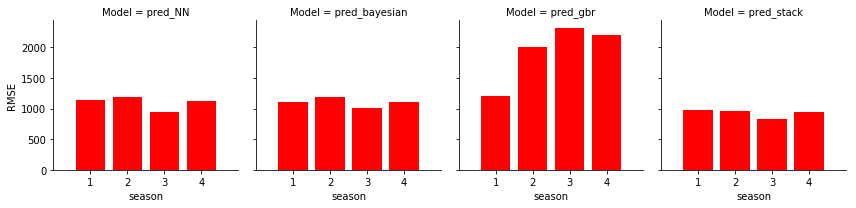

In [1830]:
#performance = performance[performance['Model']=="pred_stack"]
plot_rmse = sns.FacetGrid(performance, col="Model")
plot = plot_rmse.map(plt.bar, "season" ,"RMSE",color='r').set(xlim=(0, 5),xticks=[1,2,3,4])

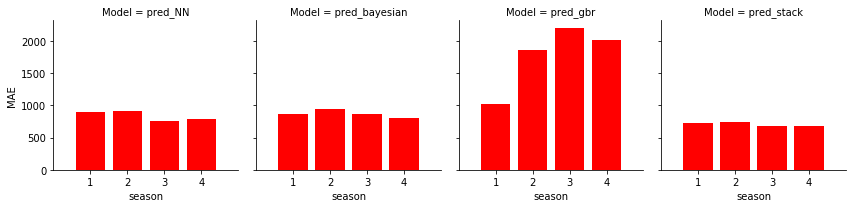

In [1831]:
plot_mae = sns.FacetGrid(performance, col="Model")
plot = plot_mae.map(plt.bar, "season" ,"MAE",color='r').set(xlim=(0, 5),xticks=[1,2,3,4])

In [1832]:
performance = pd.DataFrame()
for i in ("pred_NN","pred_bayesian","pred_gbr","pred_stack"):
    RMSE = round(sqrt(mean_squared_error(prediction['cnt'], prediction[i])))
    MAE = round(mean_absolute_error(prediction['cnt'], prediction[i]))
    row = (i, RMSE, MAE)
    performance = performance.append(pd.DataFrame(list(row)).T,ignore_index=True,verify_integrity=False) 

In [1833]:
# RMSE & MAE per model
performance.columns = ('Model', 'RMSE', 'MAE')
performance

,Model,RMSE,MAE
0,pred_NN,1102,836
1,pred_bayesian,1103,869
2,pred_gbr,1985,1774
3,pred_stack,930,703


# 2.Using "increase_pertentage" as target variable

In [1834]:
bikedata['shift_cnt'] = bikedata['cnt'].shift(2)
bikedata.head()
index = bikedata['yr']
traindata = bikedata[index == 0]
testdata = bikedata[index ==1]


In [1835]:
cnt = bikedata[index == 1]
shift_cnt = bikedata[index == 1]
shift_cnt = shift_cnt['shift_cnt']

In [1836]:
cols = [0,1,2,4,10,14,15,16,18,19,20,21,22,25,26,27,28,29,31]
traindata.drop(traindata.columns[cols],axis=1,inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1837]:
traindata.columns.values.tolist()

['season',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'atemp',
 'hum',
 'windspeed',
 'weekly_avg_cnt',
 'pre_cnt_2',
 'pre_cnt_7',
 'increase_percentage']

In [1838]:
testdata.drop(testdata.columns[cols],axis=1,inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1839]:
Y_train = traindata['increase_percentage'].values
X_train = traindata.drop('increase_percentage', axis=1).values
Y_test = testdata['increase_percentage'].values
X_test = testdata.drop('increase_percentage', axis=1).values
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,1.0,0.0,0.0,0.0,1.0,0.375621,0.692500,0.192167,1709.0,2999.0,754.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.252304,0.381304,0.329665,1920.0,2485.0,1317.0
2,1.0,1.0,0.0,2.0,1.0,1.0,0.126275,0.441250,0.365671,2140.0,2294.0,1162.0
3,1.0,1.0,0.0,3.0,1.0,2.0,0.119337,0.414583,0.184700,2230.0,1951.0,2302.0
4,1.0,1.0,0.0,4.0,1.0,1.0,0.278412,0.524167,0.129987,2384.0,2236.0,2423.0


In [1840]:
#define function of calculating profit
def calculate_profit(a,b,c):   
    return round(min(a*c+c,b*c+c))*3- round(b*c+c)*2;

# 2.1 Single Model - Neural Network

In [1231]:
np.random.seed(123)
mlp = MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=1000, momentum=0.8,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False)



In [1232]:
mlp.fit(X_train,Y_train)
pred_mlp = mlp.predict(X_test)

rmse_mlp  =sqrt(mean_squared_error(Y_test, np.around(pred_mlp)))     
mae_mlp = mean_absolute_error(Y_test, np.around(pred_mlp))
prediction_mlp = pd.DataFrame({"Pred":pred_mlp,"increase_percentage":Y_test,"shift_cnt":shift_cnt})
prediction_mlp.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Pred,increase_percentage,shift_cnt
357,-88.999789,-0.235078,2999.0
358,-17.232732,-0.214889,2485.0
359,12.223114,-0.025283,2294.0
360,0.445298,0.213737,1951.0
361,-2.326356,0.463327,2236.0


In [1233]:
prediction_mlp['Profit'] = prediction_mlp.apply(lambda row: calculate_profit(row['increase_percentage'], row['Pred'],row['shift_cnt']), axis=1)
prediction_mlp.head()

,Pred,increase_percentage,shift_cnt,Profit
357,-88.999789,-0.235078,2999.0,-263911.0
358,-17.232732,-0.214889,2485.0,-40338.0
359,12.223114,-0.025283,2294.0,-53960.0
360,0.445298,0.213737,1951.0,1464.0
361,-2.326356,0.463327,2236.0,-2966.0


In [1234]:
profit_mlp = sum(prediction_mlp['Profit'])
print("Profit:{}".format(profit_mlp))
print("RMSE:{0:.8}".format(rmse_mlp))
print("MAE:{0:.08}".format(mae_mlp))

Profit:-50396659.0
RMSE:24.664763
MAE:15.898952


# 2.2 Single Model - Bayesian Regression

In [1235]:
np.random.seed(123)
bayesian = linear_model.BayesianRidge(alpha_1=0.0001, alpha_2=0.0001,
       fit_intercept=True, lambda_1=0.001, lambda_2=0.001, n_iter=1000,
       tol=0.01, verbose=False)

In [1236]:
bayesian_fit = bayesian.fit(X_train, Y_train)
pred_bayesian = bayesian_fit.predict(X_test)


rmse_bayesian  =sqrt(mean_squared_error(Y_test, np.around(pred_bayesian)))     
mae_bayesian = mean_absolute_error(Y_test, np.around(pred_bayesian))
pred_bayesian = pd.DataFrame({"Pred":pred_bayesian , "increase_percentage":Y_test, "shift_cnt":shift_cnt})     
pred_bayesian.head()

,Pred,increase_percentage,shift_cnt
357,-0.346755,-0.235078,2999.0
358,-0.218708,-0.214889,2485.0
359,0.093802,-0.025283,2294.0
360,0.111562,0.213737,1951.0
361,0.328590,0.463327,2236.0


In [1237]:
pred_bayesian['Profit'] = pred_bayesian.apply(lambda row: calculate_profit(row['increase_percentage'],row['Pred'], row['shift_cnt']), axis=1)
pred_bayesian.head()

,Pred,increase_percentage,shift_cnt,Profit
357,-0.346755,-0.235078,2999.0,1959.0
358,-0.218708,-0.214889,2485.0,1942.0
359,0.093802,-0.025283,2294.0,1690.0
360,0.111562,0.213737,1951.0,2169.0
361,0.328590,0.463327,2236.0,2971.0


In [1238]:
profit_bayesian = sum(pred_bayesian['Profit'])

print("Profit:{}".format(profit_bayesian))
print("RMSE:{0:.8}".format(rmse_bayesian))
print("MAE:{0:.08}".format(mae_bayesian))
#1587415

Profit:1183092.0
RMSE:0.6361102
MAE:0.44479904


# 2.3 Ensemble - GradientBoosting Regression

In [1239]:
np.random.seed(123)
gbr = GradientBoostingRegressor(alpha = 0.1,n_estimators=300, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
gbr.fit(X_train,Y_train)
pred_gbr = gbr.predict(X_test)

rmse_gbr  =sqrt(mean_squared_error(Y_test, np.around(pred_gbr)))     
mae_gbr = mean_absolute_error(Y_test, np.around(pred_gbr))
pred_gbr = pd.DataFrame({"Pred":np.around(pred_gbr),"increase_percentage":Y_test,"shift_cnt":shift_cnt})
pred_gbr['Profit'] = pred_gbr.apply(lambda row: calculate_profit(row['increase_percentage'], row['Pred'], row['shift_cnt']), axis=1)
profit_gbr = sum(pred_gbr['Profit'])  #1497007.0

1497007.0

In [1240]:
print("Profit:{}".format(profit_gbr))
print("RMSE:{0:.8}".format(rmse_gbr))
print("MAE:{0:.08}".format(mae_gbr))

Profit:1497007.0
RMSE:0.44658417
MAE:0.23946583


# 2.4 Ensemble - Stacking

In [1241]:
# Initializing models
svr_lin = SVR(kernel='linear')
mlp = MLPRegressor(random_state=1)
lasso = Lasso(random_state=1)

In [1242]:
np.random.seed(123)
stack = StackingCVRegressor(regressors=(svr_lin, lasso, gbr, bayesian),
                            meta_regressor=gbr)

In [1243]:
stack.fit(X_train,Y_train)

StackingCVRegressor(cv=5,
          meta_regressor=GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=300,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False),
          refit=True,
          regressors=(SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False), Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   ...True, lambda_1=0.001, lambda_2=0.001,
       n_iter=1000, normalize=False, tol=0.01, verbose=False)),
          shuffle=True, store_train_me

In [1244]:
pred_stack = stack.predict(X_test)

rmse_stack  =sqrt(mean_squared_error(Y_test, np.around(pred_stack)))     
mae_stack = mean_absolute_error(Y_test, np.around(pred_stack))
pred_stack = pd.DataFrame({"Pred":pred_stack,"increase_percentage":Y_test,"shift_cnt":shift_cnt})
pred_stack.head()

,Pred,increase_percentage,shift_cnt
357,-0.079982,-0.235078,2999.0
358,-0.335661,-0.214889,2485.0
359,-0.236093,-0.025283,2294.0
360,-0.264793,0.213737,1951.0
361,0.079124,0.463327,2236.0


In [1245]:
pred_stack['Profit'] = pred_stack.apply(lambda row: calculate_profit(row['increase_percentage'], row['Pred'],row['shift_cnt']), axis=1)

In [1246]:
profit_stack = sum(pred_stack['Profit'])
profit_stack  #1648526

1648526.0

In [1247]:
print("Profit:{}".format(profit_stack))
print("RMSE:{0:.8}".format(rmse_stack))
print("MAE:{0:.08}".format(mae_stack))

Profit:1648526.0
RMSE:0.44452141
MAE:0.23625412


# 3.Using one and a half year data as traindata

In [1673]:
bikedata = pd.read_csv('~/Desktop/bikedata.csv', index_col=False)
bikedata.head()

,Unnamed: 0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,...,avg_hum,avg_windspeed,pre_cnt_2,pre_cnt_7,casual_2,casual_7,registered_2,registered_7,trend,increase_percentage
0,9,9,9/1/11,1,0,1,0,0,0,1,...,0.569077,0.180397,1510.0,801.0,148,131,1362,670,-1,-0.455629
1,10,10,10/1/11,1,0,1,0,1,1,1,...,0.530506,0.195591,959.0,1349.0,68,120,891,1229,1,0.377477
2,11,11,11/1/11,1,0,1,0,2,1,2,...,0.493089,0.211793,822.0,1562.0,54,108,768,1454,1,0.536496
3,12,12,12/1/11,1,0,1,0,3,1,1,...,0.499609,0.208215,1321.0,1600.0,41,82,1280,1518,-1,-0.120363
4,13,13,13/1/11,1,0,1,0,4,1,1,...,0.513314,0.202763,1263.0,1606.0,43,88,1220,1518,1,0.113222


In [1674]:
traindata = bikedata[(bikedata['yr'] == 0) | ((bikedata['yr'] == 1) & (bikedata['mnth']) < 7)]
testdata = bikedata[(bikedata['yr'] == 1) & (bikedata['mnth'] >6)]
traindata.head()

cols = [0,1,2,4,10,14,15,18,19,20,21,22,25,26,27,28,29,30]
traindata.drop(traindata.columns[cols],axis=1,inplace=True)

testdata.drop(testdata.columns[cols],axis=1,inplace=True)
testdata.columns.values.tolist()

Y_train = traindata['cnt'].values
X_train = traindata.drop('cnt', axis=1).values

Y_test = testdata['cnt'].values
X_test = testdata.drop('cnt', axis=1).values

pd.DataFrame(X_test).head()

profit_original = sum(Y_test)
profit_original

#define function of calculating profit
def calculate_profit(a,b):
    return min(a,b)*3-b*2;

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# 3.1 Single Model - Neural Network

In [1676]:
np.random.seed(123)
mlp = MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=1000, momentum=0.8,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False)


mlp.fit(X_train,Y_train)
pred_mlp = mlp.predict(X_test)
rmse_mlp  =sqrt(mean_squared_error(Y_test, np.around(pred_mlp)))     
mae_mlp = mean_absolute_error(Y_test, np.around(pred_mlp))
prediction_mlp = pd.DataFrame({"Pred":np.around(pred_mlp),"cnt":Y_test})
prediction_mlp.head()

prediction_mlp['Profit'] = prediction_mlp.apply(lambda row: calculate_profit(row['cnt'], row['Pred']), axis=1)
prediction_mlp.head()

profit_mlp = sum(prediction_mlp['Profit'])
print("Profit:{}".format(profit_mlp))
print("RMSE:{0:.8}".format(rmse_mlp))
print("MAE:{0:.08}".format(mae_mlp)) #898500.0

Profit:898500.0
RMSE:1107.883
MAE:810.36413


# 3.2 Single Model - Bayesian Regression

In [1677]:
np.random.seed(123)
bayesian = linear_model.BayesianRidge(alpha_1=0.0001, alpha_2=0.0001,
       fit_intercept=True, lambda_1=0.001, lambda_2=0.001, n_iter=1000,
       tol=0.01, verbose=False)

bayesian_fit = bayesian.fit(X_train, Y_train)
pred_bayesian = bayesian_fit.predict(X_test)

rmse_bayesian  =sqrt(mean_squared_error(Y_test, np.around(pred_bayesian)))     
mae_bayesian = mean_absolute_error(Y_test, np.around(pred_bayesian))                         
pred_bayesian = pd.DataFrame({"Pred":np.around(pred_bayesian),"cnt":Y_test})
pred_bayesian['Profit'] = pred_bayesian.apply(lambda row: calculate_profit(row['cnt'], row['Pred']), axis=1)
pred_bayesian.head()
profit_bayesian = sum(pred_bayesian['Profit'])

print("Profit:{}".format(profit_bayesian))
print("RMSE:{0:.8}".format(rmse_bayesian))
print("MAE:{0:.08}".format(mae_bayesian)) #900070

Profit:900070.0
RMSE:1116.6269
MAE:820.21196


# 3.3 Ensemble Model - GradientBoosting Regression

In [1678]:
np.random.seed(123)
gbr = GradientBoostingRegressor(alpha = 0.1,n_estimators=300, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
gbr.fit(X_train,Y_train)
pred_gbr = gbr.predict(X_test)
rmse_gbr  =sqrt(mean_squared_error(Y_test, np.around(pred_gbr)))     
mae_gbr = mean_absolute_error(Y_test, np.around(pred_gbr))

pred_gbr = pd.DataFrame({"Pred":np.around(pred_gbr),"cnt":Y_test})
pred_gbr['Profit'] = pred_gbr.apply(lambda row: calculate_profit(row['cnt'], row['Pred']), axis=1)
profit_gbr = sum(pred_gbr['Profit'])
print("Profit:{}".format(profit_gbr))
print("RMSE:{0:.8}".format(rmse_gbr))
print("MAE:{0:.08}".format(mae_gbr))  #1027398.0

Profit:1027398.0
RMSE:625.43932
MAE:372.65217


# 3.4 Ensemble - Stacking

In [1679]:
# Initializing models
svr_lin = SVR(kernel='linear')
mlp = MLPRegressor(random_state=1)
lasso = Lasso(random_state=1)

np.random.seed(123)
stack = StackingCVRegressor(regressors=(svr_lin, lasso, gbr, bayesian),
                            meta_regressor=gbr)

stack.fit(X_train,Y_train)
pred_stack = stack.predict(X_test)

rmse_stack  =sqrt(mean_squared_error(Y_test, np.around(pred_stack)))     
mae_stack = mean_absolute_error(Y_test, np.around(pred_stack))
pred_stack = pd.DataFrame({"Pred":np.around(pred_stack),"cnt":Y_test})
pred_stack.head()

pred_stack['Profit'] = pred_stack.apply(lambda row: calculate_profit(row['cnt'], row['Pred']), axis=1)
pred_stack.head()

profit_stack = sum(pred_stack['Profit'])
print("Profit:{}".format(profit_stack))
print("RMSE:{0:.8}".format(rmse_stack))
print("MAE:{0:.08}".format(mae_stack))  #1010119.0

Profit:1010119.0
RMSE:638.10588
MAE:421.0


# 4. Using trend as target variable  


In [27]:
index = bikedata['yr']
traindata = bikedata[index == 0]
testdata = bikedata[index ==1]

In [28]:
Y_train = traindata['trend'].values
X_train = traindata[['mnth','holiday', 'weekday','workingday', 'atemp', 'hum', 'windspeed','pre_cnt_2','pre_cnt_7']]
Y_test = testdata['trend'].values
X_test = testdata[['mnth','holiday', 'weekday','workingday', 'atemp', 'hum', 'windspeed','pre_cnt_2','pre_cnt_7']]
pd.DataFrame(X_test).head()

,mnth,holiday,weekday,workingday,atemp,hum,windspeed,pre_cnt_2,pre_cnt_7
357,1,0,0,0,0.375621,0.692500,0.192167,2999.0,754.0
358,1,1,1,0,0.252304,0.381304,0.329665,2485.0,1317.0
359,1,0,2,1,0.126275,0.441250,0.365671,2294.0,1162.0
360,1,0,3,1,0.119337,0.414583,0.184700,1951.0,2302.0
361,1,0,4,1,0.278412,0.524167,0.129987,2236.0,2423.0


In [29]:
#define function of calculating profit
def calculate_profit(a,b):
    return min(a,b)*3-b*2;

# 4.1 Single Model - Neural Network

In [12]:
from mlxtend.classifier import StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
NN_train = MLPClassifier(activation='relu', alpha=0.0005, batch_size='auto',
       epsilon=1e-08, hidden_layer_sizes=(10,5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.1, validation_fraction=0.01, verbose=False,
       warm_start=False)

In [13]:
NN_train = NN_train.fit(X_train,Y_train)
y_nn = NN_train.predict(X_test)
score = NN_train.score(X_test,Y_test)
score#0.65

0.6502732240437158

In [14]:
list=[]
for i in y_nn:
    if i ==1:
        y=702
    else:
        y=-721
    list.append(y)
    
Y_actual = testdata['cnt'].values
Y_pre2 = testdata['pre_cnt_2'].values
pred = np.array(Y_pre2)+np.array(list)
pred_nn = pd.DataFrame({"Pred":pred,"cnt":Y_actual})

In [15]:
##### Profit Function ####

pred_nn['Profit'] = pred_nn.apply(lambda row: calculate_profit(row['cnt'], row['Pred']), axis=1)
profit_ynn = sum(pred_nn['Profit'])
print (profit_ynn)#1540079

1540079.0


In [17]:
profit_nn = sum(pred_nn['Profit'])
print(profit_nn)

1540079.0


# 4.2 Single Model - SVC

In [18]:
svc_rbf = SVC(kernel='rbf', C=10, gamma=0.0001)
y_rbf = svc_rbf.fit(X_train, Y_train).predict(X_test)

##################################################################################
rbf_score = svc_rbf.score(X_test,Y_test)
rbf_score

list=[]
for i in y_rbf:
    if i ==1:
        y=702
    else:
        y=-721
    list.append(y)
    
Y_actual = testdata['cnt'].values
Y_pre2 = testdata['pre_cnt_2'].values


pred = np.array(Y_pre2)+np.array(list)
pred_rbf = pd.DataFrame({"Pred":pred,"cnt":Y_actual})


##### Profit Function ####
def calculate_profit(a,b):
    return min(a,b)*3-b*2;

pred_rbf['Profit'] = pred_rbf.apply(lambda row: calculate_profit(row['cnt'], row['Pred']), axis=1)
profit_yrbf = sum(pred_rbf['Profit'])
print (profit_yrbf)#1313877
rbf_score#0.494

1313877.5


0.49453551912568305

# 4.3 Stacking

In [30]:
###### Data Input #######
cols = [0,1,2,4,10,14,15,16,18,19,20,21,22,25,26,27,28,30]
traindata.drop(traindata.columns[cols],axis=1,inplace=True)

testdata.drop(testdata.columns[cols],axis=1,inplace=True)

###### X/Y  #######

Y_train = traindata['trend'].values
X_train = traindata.drop('trend', axis=1).values

Y_test = testdata['trend'].values
X_test = testdata.drop('trend', axis=1).values

/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          use_probas=True,
                       
                          meta_classifier=lr)
     
    
    
############# 
from mlxtend.classifier import StackingCVClassifier
np.random.seed(123)
stack = StackingCVClassifier(classifiers=(clf1, clf2, clf3), meta_classifier=lr)
stack.fit(X_train,Y_train)
pred = stack.predict(X_test)
pred_stack = pd.DataFrame({"Pred":np.around(pred),"Trend":Y_test})
pred_stack.head()
print(confusion_matrix(Y_test, pred))



list=[]
for i in pred:
    if i ==1:
        y=702
    else:
        y=-721
    list.append(y)
    

###### Actual Y #####

prediction = np.array(Y_pre2)+np.array(list)
pred_stack = pd.DataFrame({"Pred":prediction,"cnt":Y_actual})


##### Profit Function ####


pred_stack['Profit'] = pred_stack.apply(lambda row: calculate_profit(row['cnt'], row['Pred']), axis=1)
profit_stack = sum(pred_stack['Profit'])
print (profit_stack)



ImportError: cannot import name 'StackingCVClassifier'